In [1]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.5 which is incompatible.


Upload any image that that has a person. We take two example images from the web: https://unsplash.com/photos/v4zceVZ5HK8 and https://unsplash.com/photos/e_rhazQLaSs.


In [7]:
from google.colab import files
uploaded = files.upload()

Saving cow.webp to cow.webp
Saving holstein.jpg to holstein (1).jpg


cow.webp


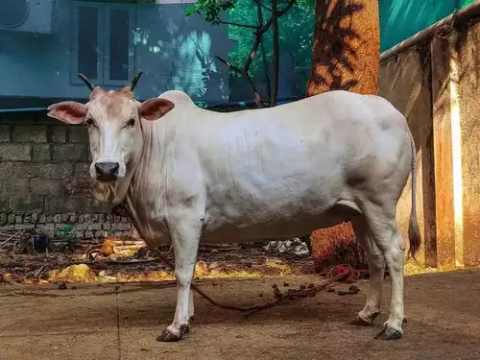

holstein (1).jpg


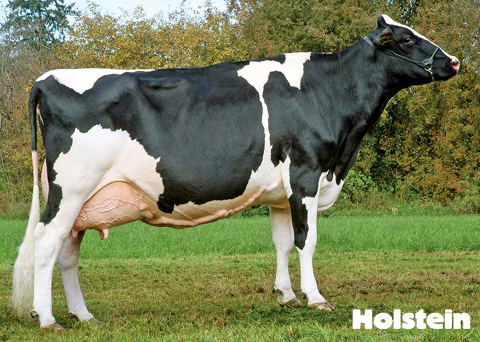

In [8]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)
  resize_and_show(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Pose solution, we can access this module as `mp_pose = mp.solutions.pose`.

You may change the parameters, such as `static_image_mode` and `min_detection_confidence`, during the initialization. Run `help(mp_pose.Pose)` to get more informations about the parameters.

In [9]:
import mediapipe as mp
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

Nose coordinates: (107.88916796445847, 106.53602331876755)
Pose landmarks of cow.webp:


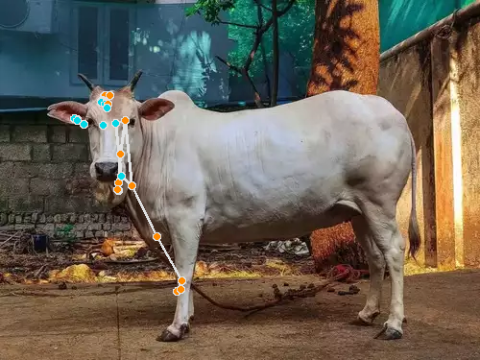

Nose coordinates: (204.35421466827393, 502.7285153865814)
Pose landmarks of holstein (1).jpg:


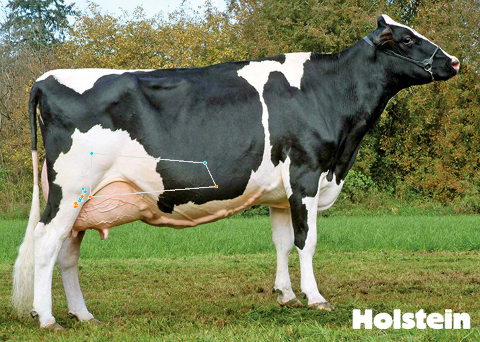

In [10]:
# Run MediaPipe Pose and draw pose landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0, model_complexity=2) as pose:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print nose landmark.
    image_hight, image_width, _ = image.shape
    if not results.pose_landmarks:
      continue
    print(
      f'Nose coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
    )

    # Draw pose landmarks.
    print(f'Pose landmarks of {name}:')
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    resize_and_show(annotated_image)

Nose world landmark:
x: -0.157607511
y: -0.445661664
z: -0.441923767
visibility: 0.999995947



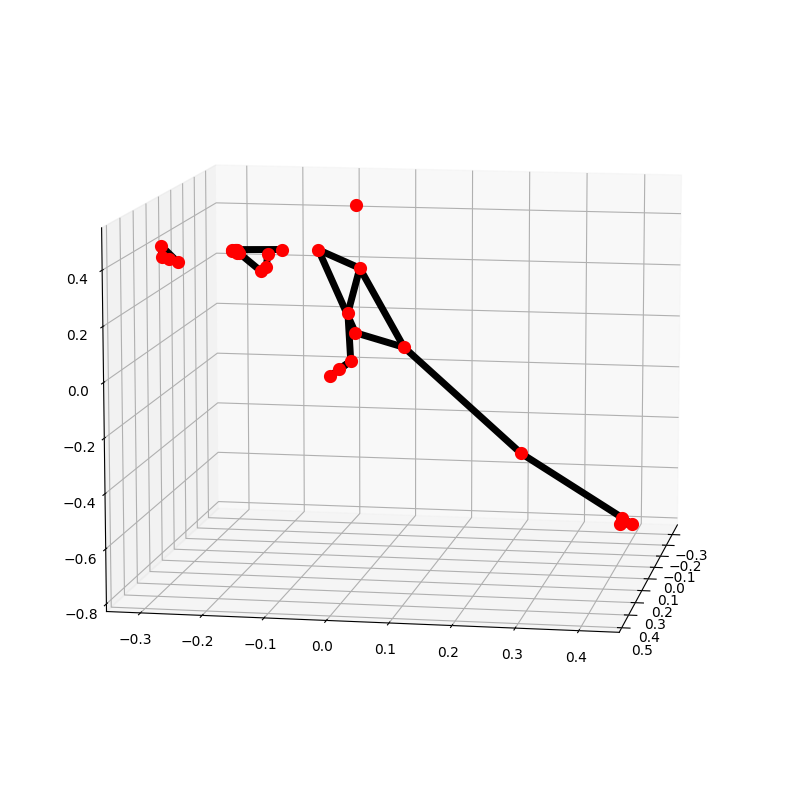

Nose world landmark:
x: -0.478551567
y: 0.098492153
z: 0.0611064322
visibility: 0.935848057



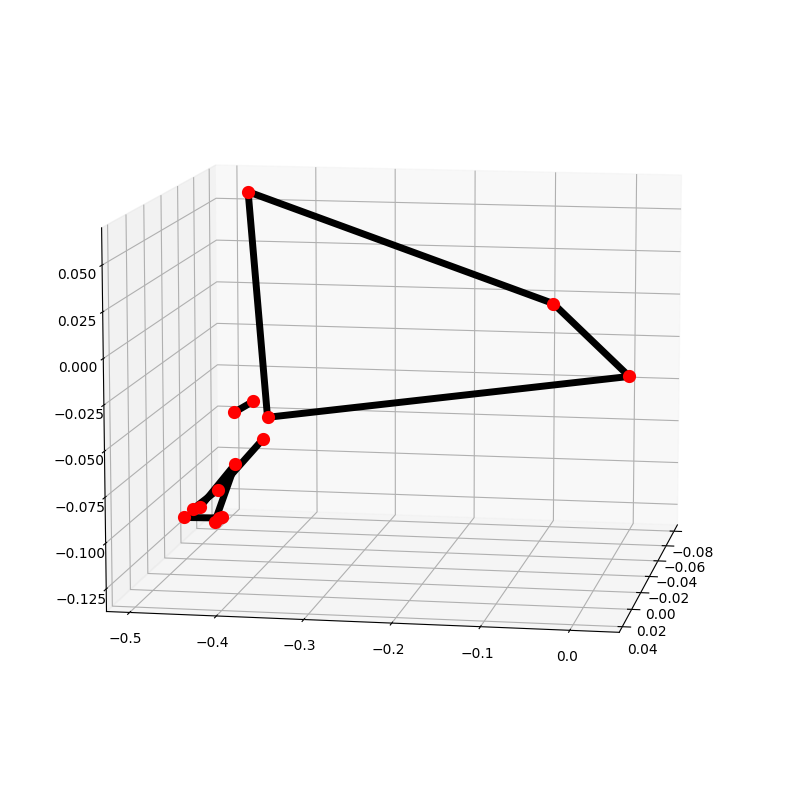

In [12]:
# Run MediaPipe Pose and plot 3d pose world landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0, model_complexity=2) as pose:
  for name, image in images.items():
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print the real-world 3D coordinates of nose in meters with the origin at
    # the center between hips.
    print('Nose world landmark:'),
    print(results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE])

    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

Pose segmentation of cow.webp:


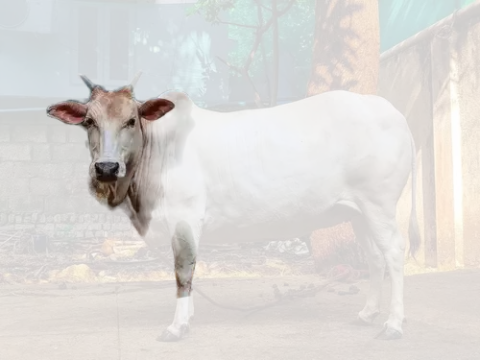

Pose segmentation of holstein (1).jpg:


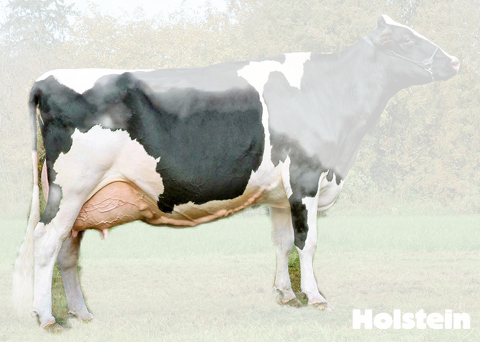

In [13]:
# Run MediaPipe Pose with `enable_segmentation=True` to get pose segmentation.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0,
    model_complexity=2, enable_segmentation=True) as pose:
  for name, image in images.items():
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw pose segmentation.
    print(f'Pose segmentation of {name}:')
    annotated_image = image.copy()
    red_img = np.zeros_like(annotated_image, dtype=np.uint8)
    red_img[:, :] = (255,255,255)
    segm_2class = 0.2 + 0.8 * results.segmentation_mask
    segm_2class = np.repeat(segm_2class[..., np.newaxis], 3, axis=2)
    annotated_image = annotated_image * segm_2class + red_img * (1 - segm_2class)
    resize_and_show(annotated_image)

In [14]:
# Run MediaPipe Pose and draw pose landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0, model_complexity=2) as pose:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
      print(f"No landmarks detected for {name}.")
      continue

    # Print all the pose landmarks.
    print(f'Landmarks for {name}:')
    for idx, landmark in enumerate(results.pose_landmarks.landmark):
      print(f'Landmark {idx}: (x: {landmark.x * image_width:.2f}, '
            f'y: {landmark.y * image_hight:.2f}, '
            f'z: {landmark.z:.2f})')


Landmarks for cow.webp:
Landmark 0: (x: 258.93, y: 243.47, z: -0.52)
Landmark 1: (x: 259.47, y: 231.67, z: -0.53)
Landmark 2: (x: 261.09, y: 229.41, z: -0.53)
Landmark 3: (x: 262.80, y: 227.49, z: -0.53)
Landmark 4: (x: 254.62, y: 238.04, z: -0.52)
Landmark 5: (x: 254.21, y: 240.37, z: -0.52)
Landmark 6: (x: 253.70, y: 242.56, z: -0.52)
Landmark 7: (x: 275.41, y: 228.18, z: -0.48)
Landmark 8: (x: 262.02, y: 247.75, z: -0.42)
Landmark 9: (x: 271.00, y: 248.97, z: -0.49)
Landmark 10: (x: 267.17, y: 256.56, z: -0.48)
Landmark 11: (x: 313.93, y: 287.87, z: -0.39)
Landmark 12: (x: 290.05, y: 293.42, z: -0.29)
Landmark 13: (x: 302.23, y: 367.52, z: -0.40)
Landmark 14: (x: 275.14, y: 321.26, z: -0.29)
Landmark 15: (x: 296.49, y: 436.42, z: -0.48)
Landmark 16: (x: 210.95, y: 295.11, z: -0.39)
Landmark 17: (x: 297.15, y: 453.47, z: -0.52)
Landmark 18: (x: 194.16, y: 284.85, z: -0.43)
Landmark 19: (x: 294.18, y: 451.72, z: -0.55)
Landmark 20: (x: 187.12, y: 282.25, z: -0.46)
Landmark 21: (x: 294

In [15]:
# Run MediaPipe Pose and draw pose landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0, model_complexity=2) as pose:
  for name, image in images.items():
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
      print(f"No landmarks detected for {name}.")
      continue

    # Print all the pose landmarks with visibility.
    print(f'Landmarks with visibility for {name}:')
    for idx, landmark in enumerate(results.pose_landmarks.landmark):
      print(f'Landmark {idx}: (x: {landmark.x * image_width:.2f}, '
            f'y: {landmark.y * image_hight:.2f}, '
            f'z: {landmark.z:.2f}, visibility: {landmark.visibility:.2f})')


Landmarks with visibility for cow.webp:
Landmark 0: (x: 258.93, y: 243.47, z: -0.52, visibility: 1.00)
Landmark 1: (x: 259.47, y: 231.67, z: -0.53, visibility: 1.00)
Landmark 2: (x: 261.09, y: 229.41, z: -0.53, visibility: 1.00)
Landmark 3: (x: 262.80, y: 227.49, z: -0.53, visibility: 1.00)
Landmark 4: (x: 254.62, y: 238.04, z: -0.52, visibility: 1.00)
Landmark 5: (x: 254.21, y: 240.37, z: -0.52, visibility: 1.00)
Landmark 6: (x: 253.70, y: 242.56, z: -0.52, visibility: 1.00)
Landmark 7: (x: 275.41, y: 228.18, z: -0.48, visibility: 1.00)
Landmark 8: (x: 262.02, y: 247.75, z: -0.42, visibility: 1.00)
Landmark 9: (x: 271.00, y: 248.97, z: -0.49, visibility: 1.00)
Landmark 10: (x: 267.17, y: 256.56, z: -0.48, visibility: 1.00)
Landmark 11: (x: 313.93, y: 287.87, z: -0.39, visibility: 1.00)
Landmark 12: (x: 290.05, y: 293.42, z: -0.29, visibility: 1.00)
Landmark 13: (x: 302.23, y: 367.52, z: -0.40, visibility: 0.60)
Landmark 14: (x: 275.14, y: 321.26, z: -0.29, visibility: 0.32)
Landmark 1